# Chapter-4 : Continous Distributions

This notebook is for Chapter 4 

Previous chapters have looked at empirical distributions which are for finite samples. Continuous distributions are characterized by a CDF that is a continuous function rather than a step function. Real-world phenomena can be modeled by continuous distributions.



In [1]:
from scipy.special import erf
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
%matplotlib inline

Text(0.5, 1.0, 'Exponential CDF')

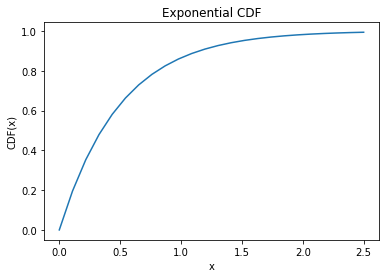

In [6]:
def cdf_exp(x, h):
    return 1.0 - np.exp(-h * x)

xs = np.linspace(0, 2.5, 24)
ys = [cdf_exp(x, 2) for x in xs]
plt.plot(xs, ys)
plt.xlabel("x")
plt.ylabel("CDF(x)")
plt.title("Exponential CDF")

### Plotting baby inter-arrival times

The babyboom.dat file provided here is extracted from the one provided in the book site by removing the metadata description.

In [ ]:
babyboom = pd.read_fwf("../data/babyboom.dat",
                      names=["time_of_birth", "sex", "birth_wgt", "num_minutes"],
                      colspecs=[(1, 8), (9, 16), (17, 24), (25, 32)])
babyboom["ia_mins"] = -(babyboom["num_minutes"] - babyboom["num_minutes"].shift(-1))
babyboom.head()

In [ ]:
ia_mins = sorted(np.array(babyboom["ia_mins"]).tolist())[:-1]

# Compute lambda as 1/average 
# print(len(ia_mins) / sum(ia_mins))
cdf_ia_mins = [cdf_exp(x, 0.03) for x in ia_mins]

plt.step(ia_mins, cdf_ia_mins)
plt.xlabel("minutes")
plt.ylabel("CDF")
plt.title("Time between births")

In order to prove that the distribution above is an exponential distribution, we need to plot the complementary CDF (CCDF = 1 - CDF) on a log scale. Since

$$CDF(x) = 1 - e^{-\lambda x}$$

$$CCDF(x) = e^{-\lambda x}$$

$$log(CCDF) = -\lambda x$$

So on a log-scale the CCDF should be a straight line with slope -h.

In [ ]:
ccdf_ia_mins = [1.0 - x for x in cdf_ia_mins]

plt.semilogy(ia_mins, ccdf_ia_mins, basey=np.e)
plt.xlabel("minutes")
plt.ylabel("log(CCDF)")
plt.title("Time between births")

For small values of n, we don't expect an empirical distribution to match a continuous distribution exactly. One way to evaluate the quality of fit is to generate a sample from a continuous distribution and see how well it matches the data.

We know the mean of our data is 32.6 mins. So lambda is 1/32.6 = 0.03. We use an exponential distribution CDF with this value of lambda to generate 44 values (same as our data) and compare the CCDF plot generated from the data to the one above.

Text(0.5, 1.0, 'Samples from Exponential Distribution')

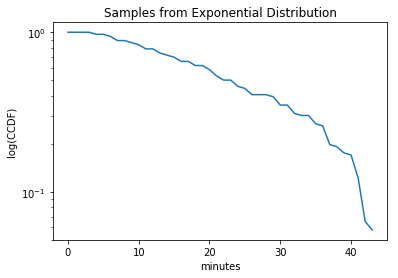

In [7]:
def cdf_exp_value(prob, h):
# Analytically reverse the exponential distribution function 
    return -math.log(1.0 - prob) / h

samples = []
for i in range(44):
    prob = np.random.random()
    samples.append(int(cdf_exp_value(prob, 0.03)))
samples_sorted = sorted(samples)

ccdf_samples = [1.0 - cdf_exp(x, 0.03) for x in samples_sorted]

plt.semilogy(range(len(samples)), ccdf_samples)
plt.xlabel("minutes")
plt.ylabel("log(CCDF)")
plt.title("Samples from Exponential Distribution")

## Pareto Distribution

Originally used to describe the distribution of wealth, since then used to describe many natural and social phenomena. Equation is:

$$CDF(x) = 1 - (\frac{x}{m})^{\alpha}$$

where m = minimum possible value.

Text(0.5, 1.0, 'Pareto CDF')

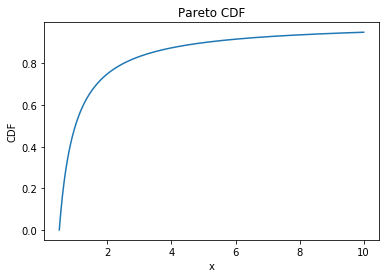

In [8]:
def cdf_pareto(x, m, a):
    if x < m:
        return 0.0
    return 1.0 - math.pow((1.0 * x / m), -a)

xs = np.linspace(0.5, 10, 1000).tolist()
ys = [cdf_pareto(x, 0.5, 1) for x in xs]

plt.plot(xs, ys)
plt.xlabel("x")
plt.ylabel("CDF")
plt.title("Pareto CDF")

Simple visual test to see if an empirical distribution fits a Pareto distribution is to check that the log-log plot of the CCDF is a straight line.

$$CDF(x) = 1 - (\frac{x}{m})^{\alpha}$$

$$CCDF(x) = (\frac{x}{m})^{\alpha}$$

$$log(CCDF(x)) = -\alpha log(x) + \alpha log(m)$$

So slope of -a and intercept of a*log(m).

We take a sample from the distribution and plot it below.

Text(0.5, 1.0, 'Samples from Pareto Distribution')

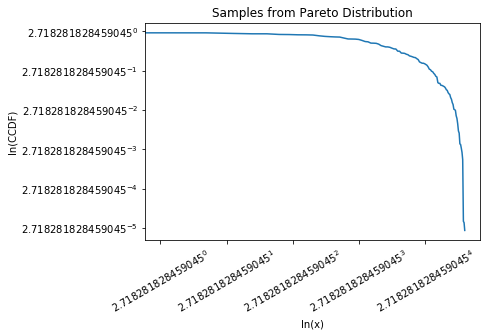

In [9]:
# # getting samples from built-in function
# samples = []
# for i in range(100):
#     samples.append(0.5 + random.paretovariate(1))
# sorted_samples = sorted(samples)

def cdf_pareto_value(prob, m, a):
# Analytically reverse the pareto function 
    return m * math.exp(-math.log(1.0 - prob, math.e) / a)

samples = []
for i in range(100):
    prob = np.random.random()
    samples.append(cdf_pareto_value(prob, 0.5, 1))
sorted_samples = sorted(samples)

ccdf_samples = [1.0 - cdf_pareto(x, 0.5, 1) for x in sorted_samples]

plt.loglog(range(len(ccdf_samples)), ccdf_samples, basex=np.e, basey=np.e)
plt.xlabel("ln(x)")
plt.ylabel("ln(CCDF)")
plt.xticks(rotation=30)
plt.title("Samples from Pareto Distribution")

### Pareto Human Heights Population

We generate 6Billion samples with m = 100cm and a = 1.7, we get a population of human heights with minimum 100cm and median 150cm.

In [10]:
# self-test to verify cdf_pareto_value is correct
median = cdf_pareto_value(0.5, 100, 1.7)
print("Median height value expected: 150 cm, actual: %.3f cm" % (median))

# generate samples (6B results in OOM)
samples = []
for i in range(60000):
    prob = np.random.random()
    samples.append(cdf_pareto_value(prob, 100, 1.7))

mean_height = 1.0 * sum(samples) / len(samples)
print("Mean height for sample: %.3f cm" % (mean_height))
num_shorter_than_mean = len([x for x in samples if x < mean_height])
print("Fraction shorter than mean: %.3f cm" % (num_shorter_than_mean / len(samples)))
print("Tallest person heigh: %.3f cm" % (max(samples)))

Median height value expected: 150 cm, actual: 150.341 cm
Mean height for sample: 241.494 cm
Fraction shorter than mean: 0.776 cm
Tallest person heigh: 37663.116 cm


### Weibull distribution

$$CDF(x) = 1 - exp^((\frac {-x}{lambda})^k)$$

Specialization of exponential distribution.

$$CDF(x) = 1 - exp^(-lambda * x)$$


Since we get a straight line from exponential by a semi-log plot, we should get the same if the x axis for the Weibull distribution is x\*\*k. Converting this to a log scale, we get k\*log(x). So we should get a straight line for a log-log plot. Testing this hypothesis by sampling from the distribution.



Text(0.5, 1.0, 'Samples from Weibull Distribution')

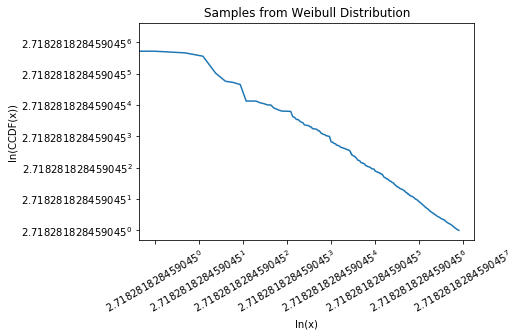

In [13]:
def cdf_weibull(x, h, k):
    if x == 0:
        return 0
    return 1.0 - math.exp(math.pow((-1.0 * x / h), k))

samples = []
for i in range(1000):
    samples.append(random.weibullvariate(-1, 2))
sorted_samples = sorted(samples)
ccdf_samples = [1.0 - cdf_weibull(x, -1, 2) for x in sorted_samples]

plt.loglog(range(len(ccdf_samples)), ccdf_samples, basex=np.e, basey=np.e)
plt.xticks(rotation=30)
plt.xlabel("ln(x)")
plt.ylabel("ln(CCDF(x))")
plt.title("Samples from Weibull Distribution")

## Normal Distribution

Most commonly used because it describes many phenomena. 

$$CDF(x) = \frac{1}{2} \left [ 1 + erf(\frac{x - \mu}{\sigma \sqrt{2}}) \right]$$

$$erf(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} e^{-t^{2}} dt$$



In [14]:
def cdf_normal(x, m, s):
    return 0.5 * (1.0 + erf((x - m) / s * math.sqrt(2.0)))



### Wechsler Adult Intelligence Scale

Model this as a normal distribution with mean 100 and standard deviation 15. We investigate what fraction of the population has IQ greater than mean, above 115, 130 and 145.

A "six-sigma" IQ is 190 (100 + 6\*15). In a world of 6 billion people, how many do we expect to have an IQ of 190 or more?

In [15]:
prob_mean = 1.0 - cdf_normal(100, 100, 15)
prob_115 = 1.0 - cdf_normal(115, 100, 15)
prob_130 = 1.0 - cdf_normal(130, 100, 15)
prob_145 = 1.0 - cdf_normal(145, 100, 15)
prob_190 = 1.0 - cdf_normal(190, 100, 15)
print("Fraction of population with IQ > mean (100): %.5f" % (prob_mean))
print("Fraction of population with IQ > 115: %.5f" % (prob_115))
print("Fraction of population with IQ > 130: %.5f" % (prob_130))
print("Fraction of population with IQ > 145: %.11f" % (prob_145))
print("#-people (of 6B) with IQ > 190: %d" % (int(6000000000 * prob_190)))

Fraction of population with IQ > mean (100): 0.50000
Fraction of population with IQ > 115: 0.02275
Fraction of population with IQ > 130: 0.00003
Fraction of population with IQ > 145: 0.00000000099
#-people (of 6B) with IQ > 190: 0


## Normal Probability Plots (Rankits)

Unlike Exponential, Pareto and Weibull distributions, there is no simple transformation to check if the normal distribution is a good model for some data. Alternative for normal distribution is probability plots. If you generate n values from a normal distribution and sort them, the k-th rankit is the mean of the distribution for the k-th value.

Cell below samples 6 numbers from a normal distribution N times, then calculates the mean. The mean values should converge to known rankit values.

In [17]:
samples = np.zeros((1, 6))
n = 10000
for i in range(n):
    samples = samples + np.sort(np.random.normal(0, 1, 6))
samples = samples / n
print(samples)

[[-1.26234264 -0.64187128 -0.19993363  0.19965185  0.63789978  1.26291659]]


## Lognormal Distribution

If log of values have a normal distribution, the values have a lognormal distribution. The CDF of the lognormal distribution is the same as the CDF of log(x) of a normal distribution.

$$CDF_{lognormal}(x) = CDF_{normal}(log(x))$$

### Adult Body Weights

Distribution of adult body weights are lognormal.